# Wisconsin Breast Cancer Dataset
The Wisconsin Breast Cancer dataset is commonly used for classification tasks, particularly for developing models to accurately classify breast masses as benign or malignant. It serves as a valuable resource for developing and evaluating machine learning algorithms and techniques in the field of breast cancer diagnosis.

This dataset contains features computed from digitized images of fine needle aspirates (FNA) of breast masses. These features are computed from a digitized image of a biopsy specimen and describe various characteristics of the cell nuclei present in the image. The goal is to predict whether a given breast mass is benign (non-cancerous) or malignant (cancerous) based on these features.

The dataset consists of 569 instances or samples, with each sample having 32 numeric features.

The Algorithms which applied on this dataset given below:
1. Perceptron
2. Random Forest Classifier
3. Decision Tree Classifier
4. Naive Bayes
5. Logistic Regression


# 1.  Imported all the Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.linear_model import Perceptron
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import f1_score, precision_score, accuracy_score, recall_score, balanced_accuracy_score

import warnings
warnings.filterwarnings('ignore')

# 2. Read Dataset

In [2]:
bc = pd.read_csv('Breast Cancer Dataset.csv')
print(bc)

           id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compa

# 3. Data Summarization

In [3]:
bc.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
bc.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


In [5]:
bc.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [6]:
bc.shape

(569, 32)

In [7]:
bc.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [8]:
# Finding missing values
bc.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [9]:
bc.isna().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [10]:
bc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [11]:
bc.duplicated().sum()

0

In [12]:
bc.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [13]:
bc.describe().T

,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
concave points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
symmetry_mean,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


In [14]:
bc.corr()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,1.000000,0.074626,0.099770,0.073159,0.096893,-0.012968,0.000096,0.050080,0.044158,-0.022114,...,0.082405,0.064720,0.079986,0.107187,0.010338,-0.002968,0.023203,0.035174,-0.044224,-0.029866
radius_mean,0.074626,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.099770,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.073159,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.096893,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,-0.012968,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.000096,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.050080,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.044158,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,-0.022114,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


In [15]:
print(bc['symmetry_worst'])

0      0.4601
1      0.2750
2      0.3613
3      0.6638
4      0.2364
        ...  
564    0.2060
565    0.2572
566    0.2218
567    0.4087
568    0.2871
Name: symmetry_worst, Length: 569, dtype: float64


In [16]:
bc['diagnosis'].unique()

array(['M', 'B'], dtype=object)

In [17]:
print(bc['diagnosis'].value_counts())

B    357
M    212
Name: diagnosis, dtype: int64


# 4. Exploratory Data Analysis

<AxesSubplot:xlabel='diagnosis', ylabel='count'>

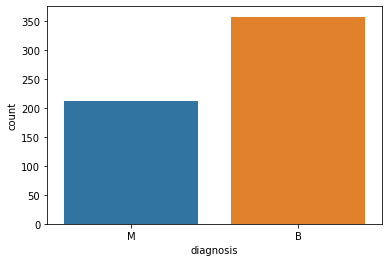

In [18]:
# count of occurrences of each unique category
sns.countplot(bc['diagnosis'])

<AxesSubplot:ylabel='diagnosis'>

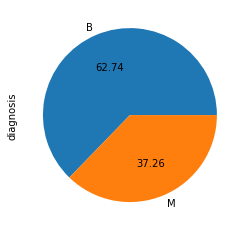

In [19]:
# Count of occurrences of each unique category by %
bc['diagnosis'].value_counts().plot.pie(autopct='%.2f')

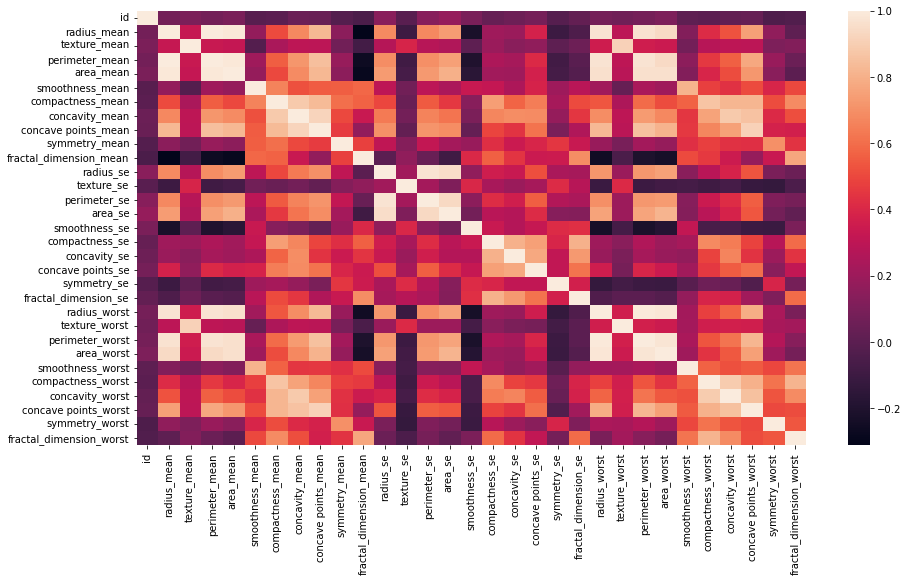

In [20]:
# Correlation matrix

correlation = bc.corr ()  

# Create a larger figure
plt.figure(figsize=(15, 8))

# Plot the heatmap
sns.heatmap(correlation)

# Display the plot
plt.show()

<AxesSubplot:>

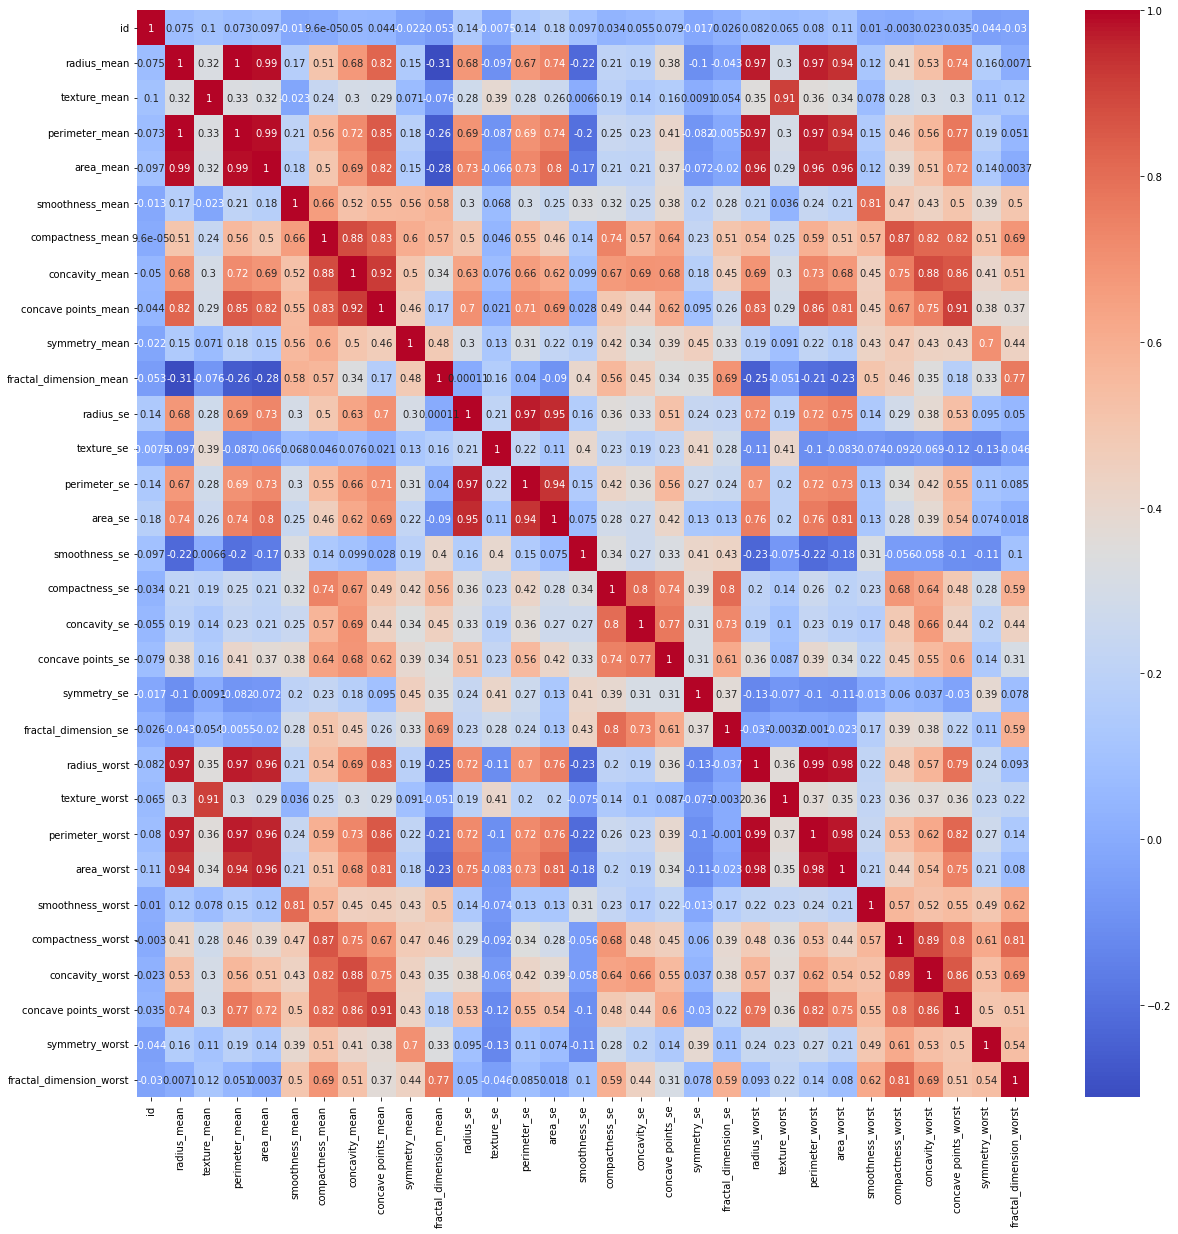

In [21]:
#Heat map
plt.figure(figsize=(20, 20))
sns.heatmap(bc.corr(),cmap='coolwarm',annot=True)

In [22]:
#Correlation Heatmap showing only those values that have a correlation greater than 0.2
corr = bc.corr()
corr = np.around(corr[corr > 0.2],2) 
corr

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
radius_mean,NaN,1.00,0.32,1.00,0.99,NaN,0.51,0.68,0.82,NaN,...,0.97,0.30,0.97,0.94,NaN,0.41,0.53,0.74,NaN,NaN
texture_mean,NaN,0.32,1.00,0.33,0.32,NaN,0.24,0.30,0.29,NaN,...,0.35,0.91,0.36,0.34,NaN,0.28,0.30,0.30,NaN,NaN
perimeter_mean,NaN,1.00,0.33,1.00,0.99,0.21,0.56,0.72,0.85,NaN,...,0.97,0.30,0.97,0.94,NaN,0.46,0.56,0.77,NaN,NaN
area_mean,NaN,0.99,0.32,0.99,1.00,NaN,0.50,0.69,0.82,NaN,...,0.96,0.29,0.96,0.96,NaN,0.39,0.51,0.72,NaN,NaN
smoothness_mean,NaN,NaN,NaN,0.21,NaN,1.00,0.66,0.52,0.55,0.56,...,0.21,NaN,0.24,0.21,0.81,0.47,0.43,0.50,0.39,0.50
compactness_mean,NaN,0.51,0.24,0.56,0.50,0.66,1.00,0.88,0.83,0.60,...,0.54,0.25,0.59,0.51,0.57,0.87,0.82,0.82,0.51,0.69
concavity_mean,NaN,0.68,0.30,0.72,0.69,0.52,0.88,1.00,0.92,0.50,...,0.69,0.30,0.73,0.68,0.45,0.75,0.88,0.86,0.41,0.51
concave points_mean,NaN,0.82,0.29,0.85,0.82,0.55,0.83,0.92,1.00,0.46,...,0.83,0.29,0.86,0.81,0.45,0.67,0.75,0.91,0.38,0.37
symmetry_mean,NaN,NaN,NaN,NaN,NaN,0.56,0.60,0.50,0.46,1.00,...,NaN,NaN,0.22,NaN,0.43,0.47,0.43,0.43,0.70,0.44


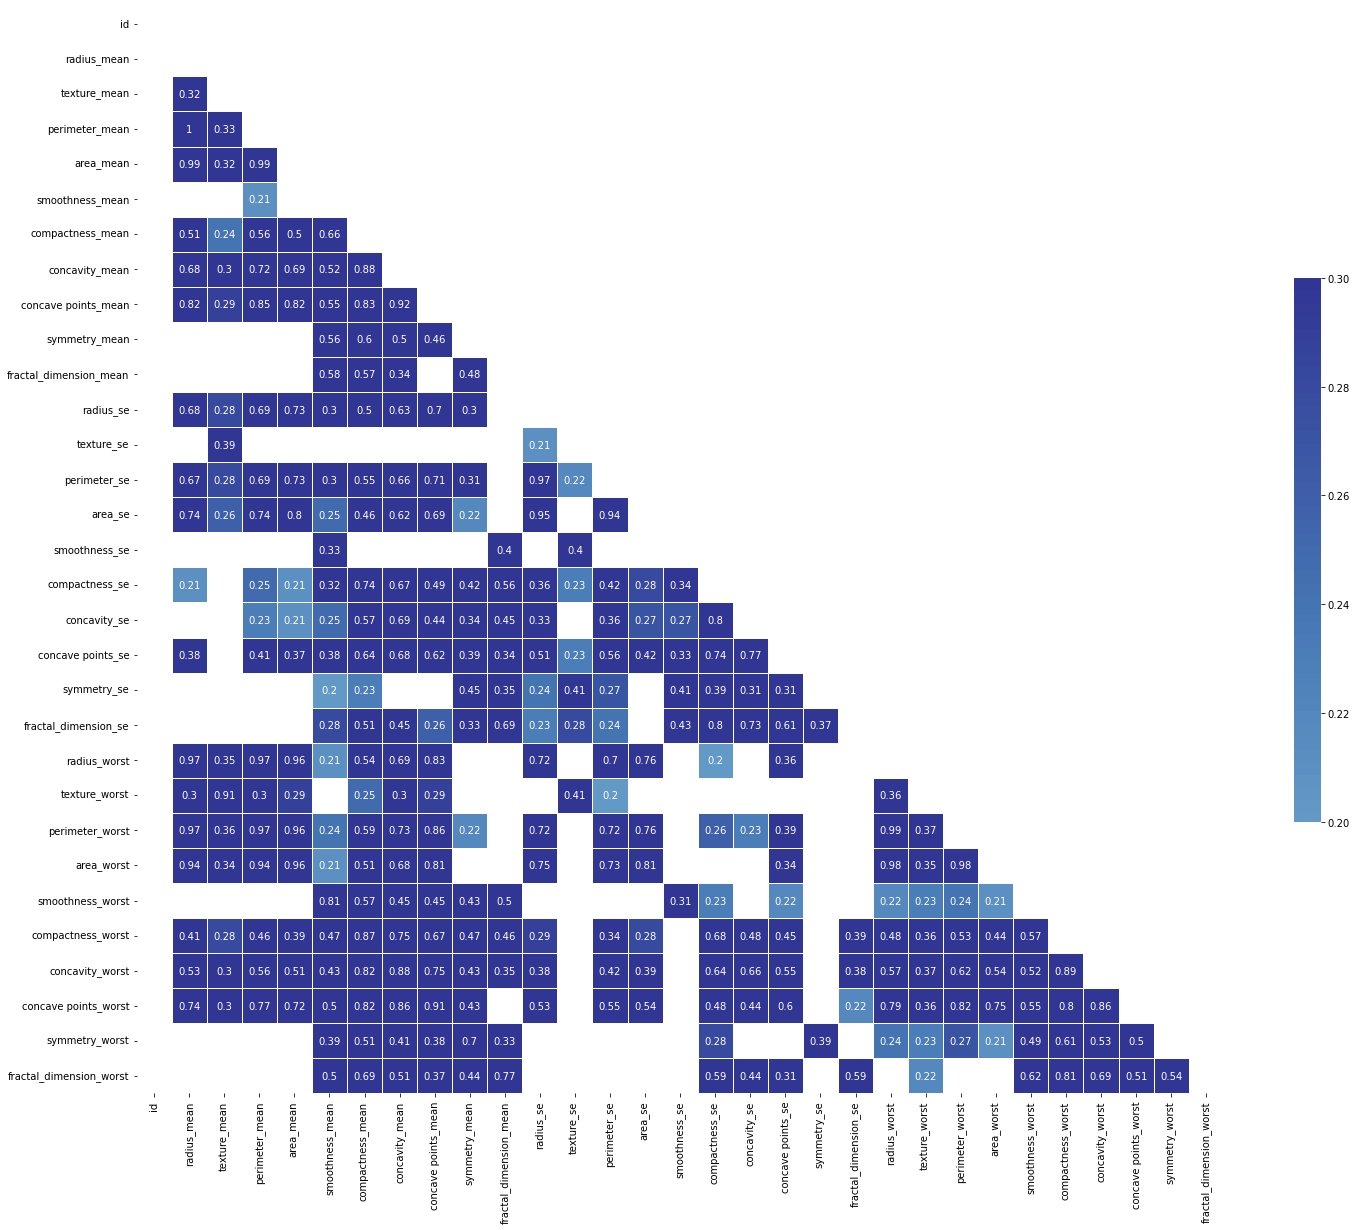

In [23]:
#Correlation Heatmap showing only those values that have a correlation greater than 0.2
corr = bc.corr()
corr = np.around(corr[corr > 0.2],2)                #filters out any negative correlation
mask = np.triu(np.ones_like(corr, dtype=bool))      #Gets rid of the other triange in the heatmap
f, ax = plt.subplots(figsize=(25,20)) 
cmap = sns.diverging_palette(220, 20, as_cmap=True)
cmap = 'RdYlBu'
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, annot=True,square=True, linewidths=.5, cbar_kws={'shrink': .5})
plt.show()

# Histograms

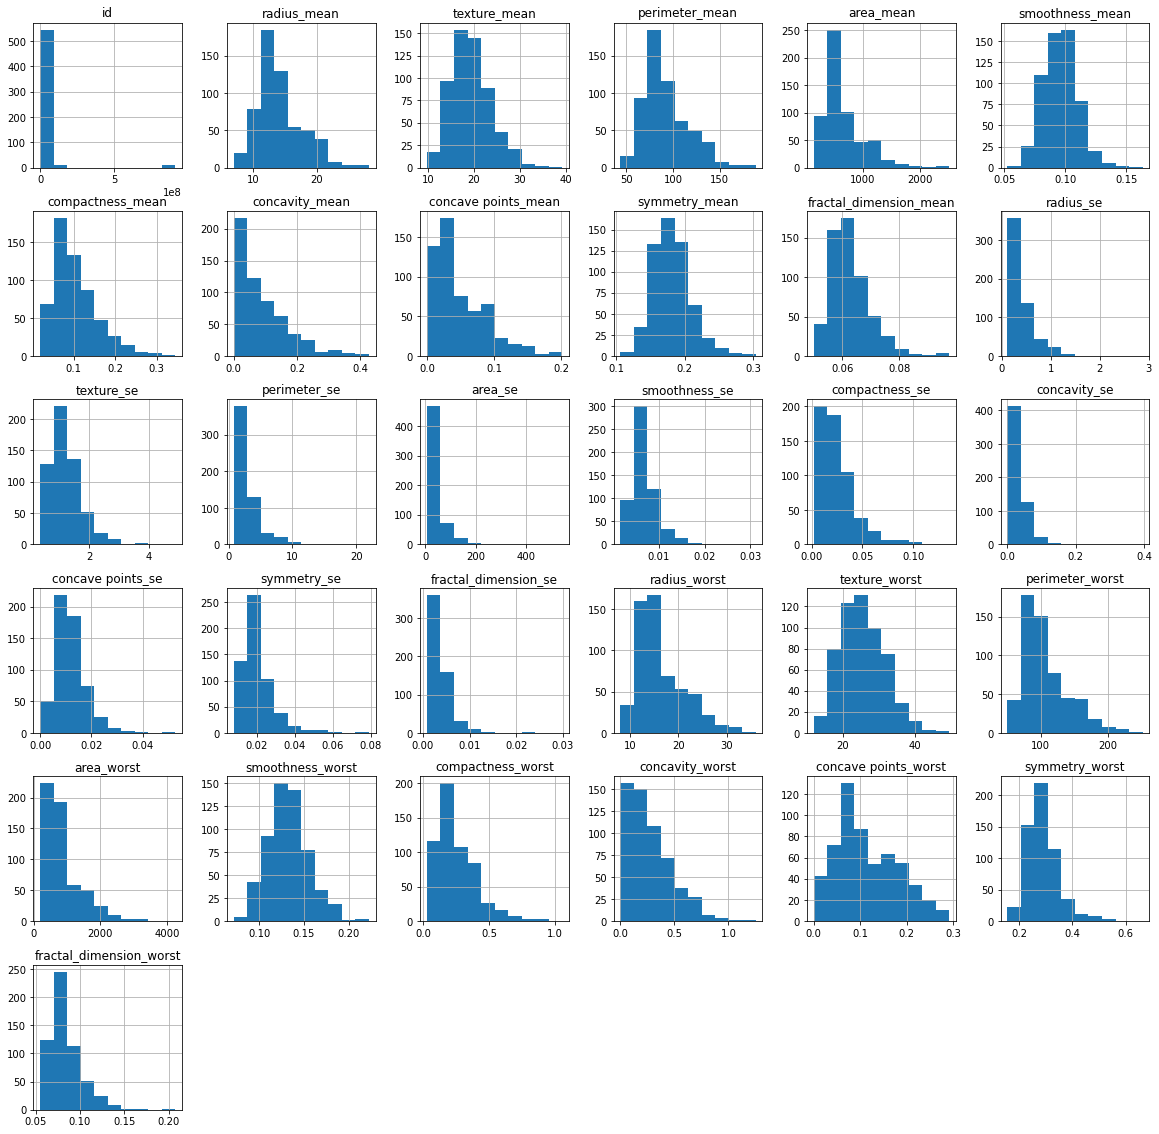

In [24]:
fig = plt.figure(figsize = (20,20))
ax = fig.gca()

bc.hist(ax = ax)
plt.show()

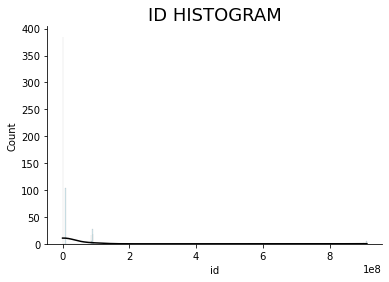

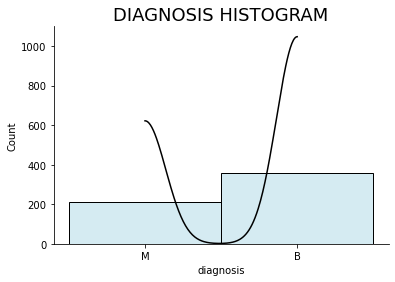

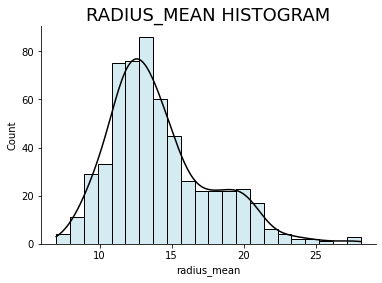

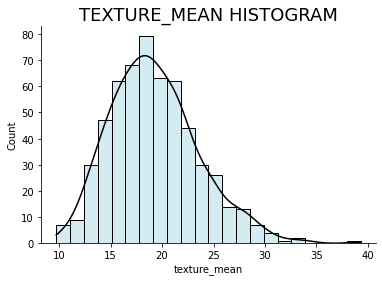

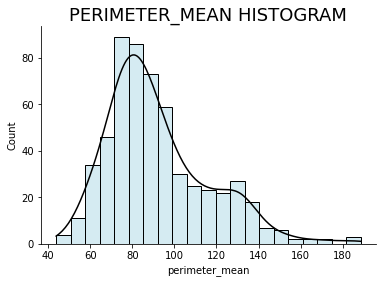

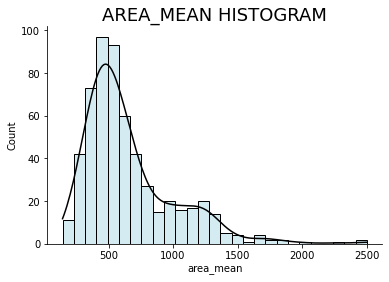

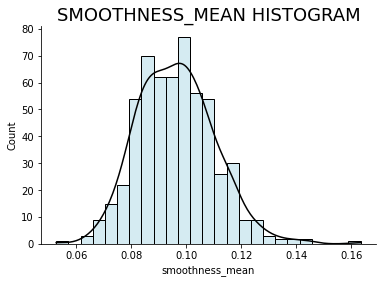

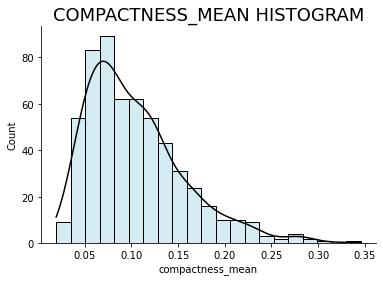

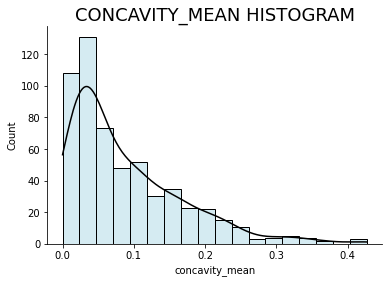

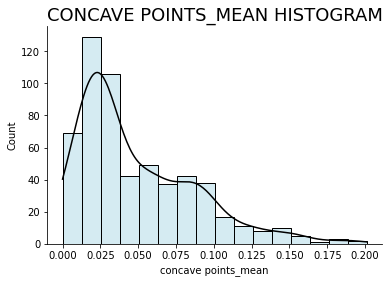

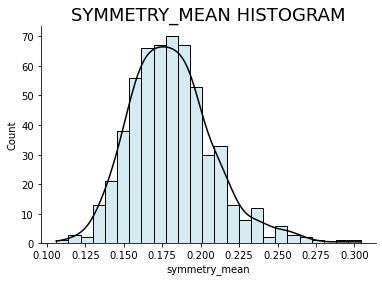

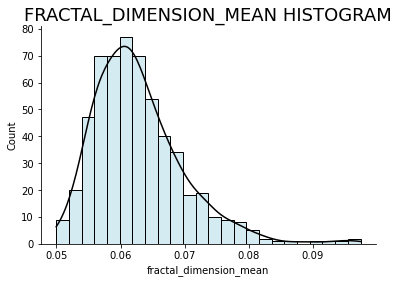

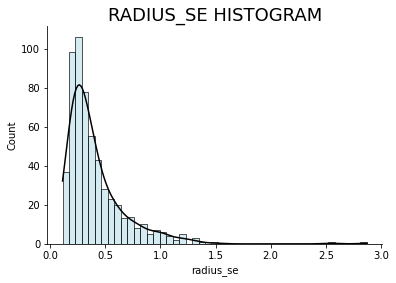

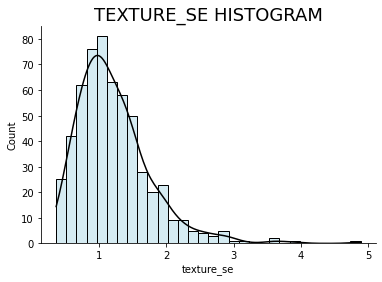

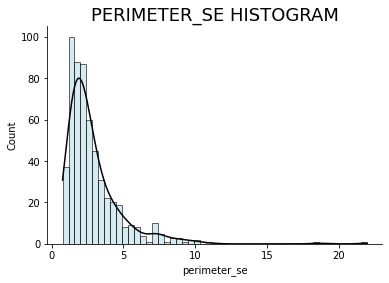

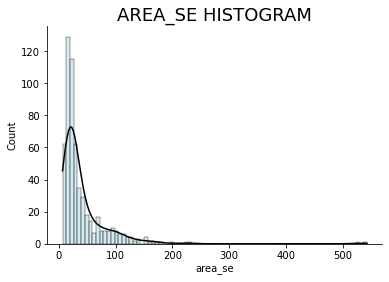

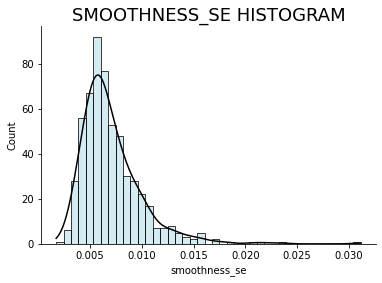

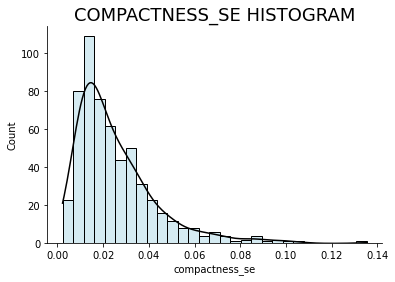

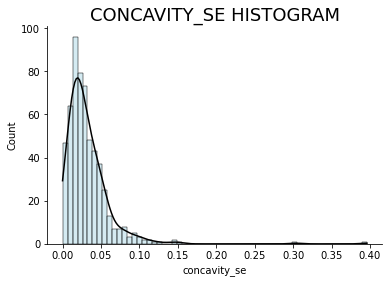

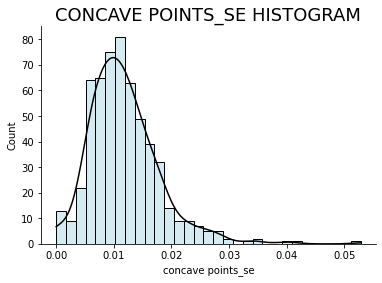

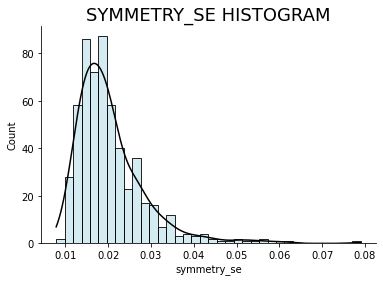

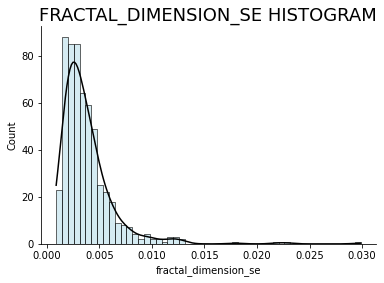

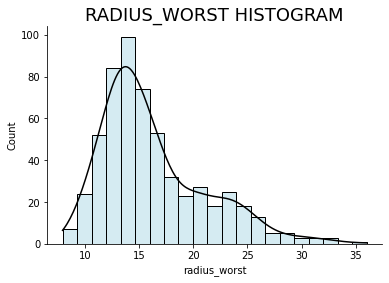

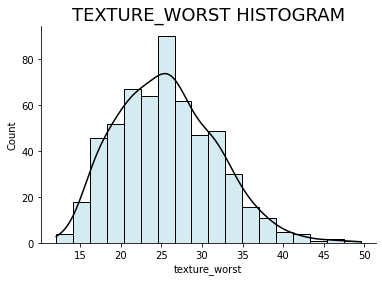

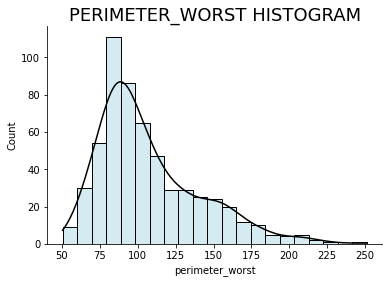

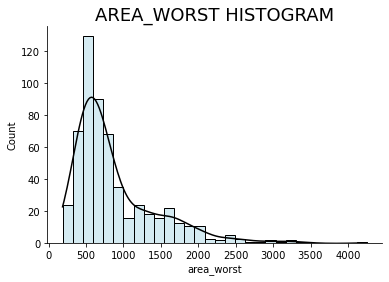

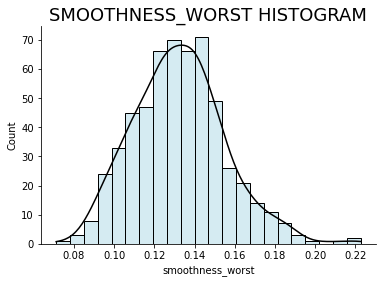

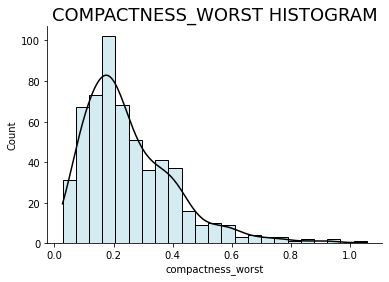

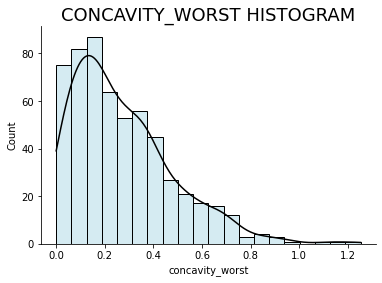

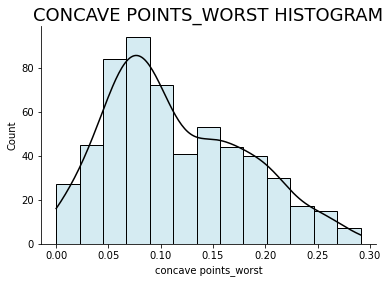

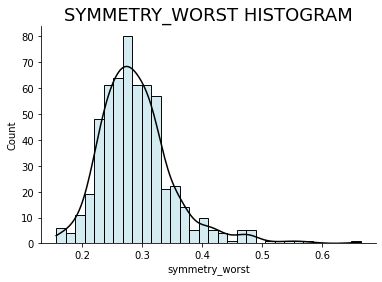

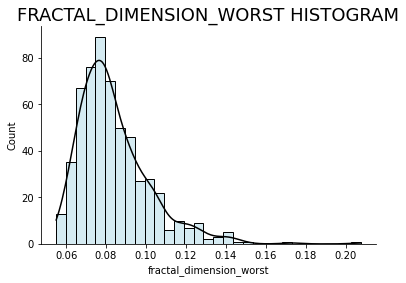

In [25]:
for i in bc.columns:
    ax = sns.histplot(bc, x=i, kde=True, color='lightblue')
    ax.lines[0].set_color('black')
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.title(i.upper() + ' HISTOGRAM', fontsize=18)
    plt.show()

# Individual Feature Visualization

<AxesSubplot:xlabel='radius_mean', ylabel='Density'>

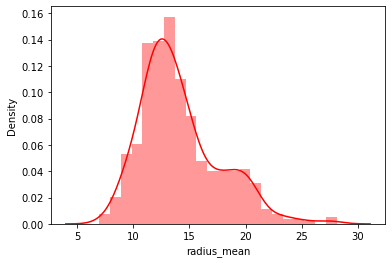

In [26]:
sns.distplot(bc.radius_mean, kde=True, color='r')

<AxesSubplot:xlabel='texture_mean', ylabel='Density'>

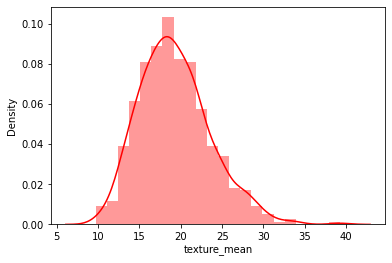

In [27]:
sns.distplot(bc.texture_mean, kde=True, color='r')

<AxesSubplot:xlabel='perimeter_mean', ylabel='Density'>

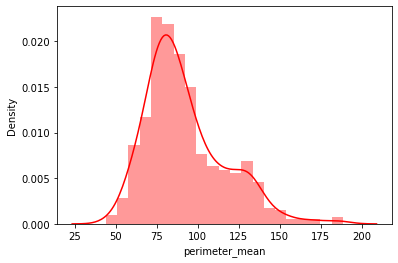

In [28]:
sns.distplot(bc.perimeter_mean, kde=True, color='r')

<AxesSubplot:xlabel='area_mean', ylabel='Density'>

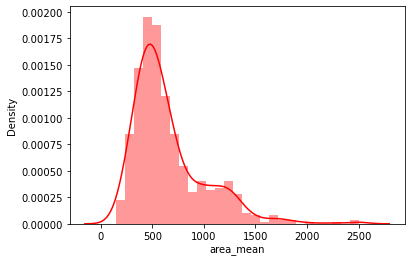

In [29]:
sns.distplot(bc.area_mean, kde=True, color='r')

<AxesSubplot:xlabel='radius_worst', ylabel='Density'>

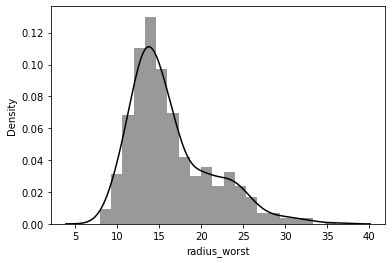

In [30]:
sns.distplot(bc.radius_worst, kde=True, color='black')

<AxesSubplot:xlabel='texture_worst', ylabel='Density'>

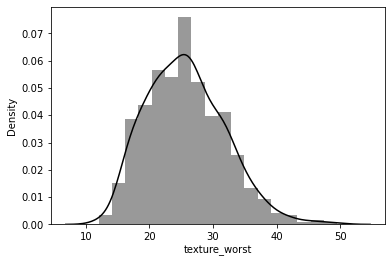

In [31]:
sns.distplot(bc.texture_worst, kde=True, color='black')

<AxesSubplot:xlabel='perimeter_worst', ylabel='Density'>

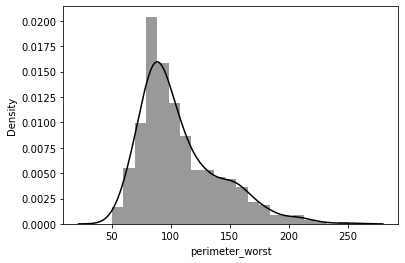

In [32]:
sns.distplot(bc.perimeter_worst, kde=True, color='black')

<AxesSubplot:xlabel='area_worst', ylabel='Density'>

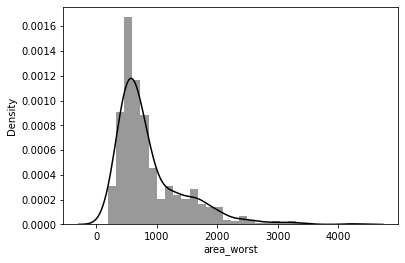

In [33]:
sns.distplot(bc.area_worst, kde=True, color='black')

<AxesSubplot:xlabel='smoothness_worst', ylabel='Density'>

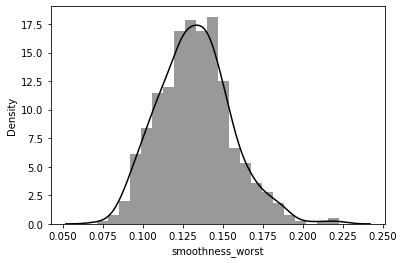

In [34]:
sns.distplot(bc.smoothness_worst, kde=True, color='black')

<AxesSubplot:xlabel='fractal_dimension_worst', ylabel='Density'>

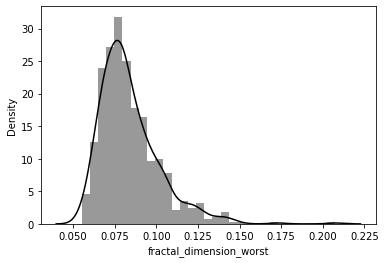

In [35]:
sns.distplot(bc.fractal_dimension_worst, kde=True, color='black')

# Scatter Plot

<AxesSubplot:xlabel='radius_mean', ylabel='radius_worst'>

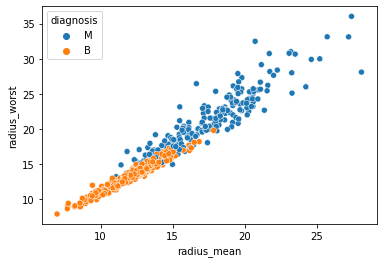

In [36]:
sns.scatterplot(x='radius_mean',y='radius_worst',data=bc,hue='diagnosis')

In [37]:
bc.head(0)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst


<AxesSubplot:xlabel='texture_mean', ylabel='texture_worst'>

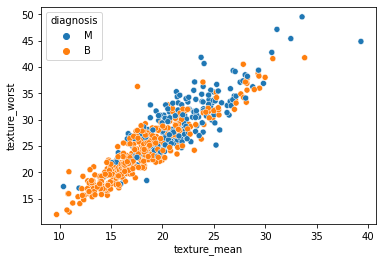

In [38]:
sns.scatterplot(x='texture_mean',y='texture_worst',data=bc,hue='diagnosis')

<AxesSubplot:xlabel='perimeter_mean', ylabel='perimeter_worst'>

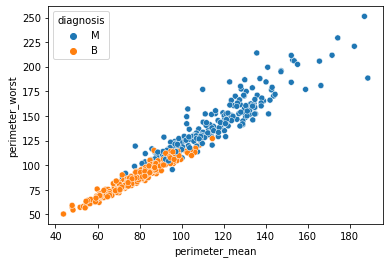

In [39]:
sns.scatterplot(x='perimeter_mean',y='perimeter_worst',data=bc,hue='diagnosis')

<AxesSubplot:xlabel='area_mean', ylabel='area_worst'>

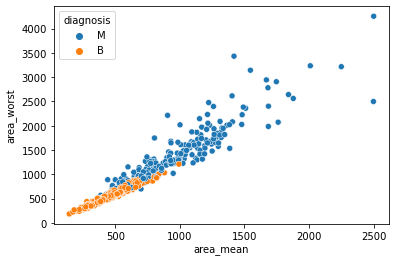

In [40]:
sns.scatterplot(x='area_mean',y='area_worst',data=bc,hue='diagnosis')

<AxesSubplot:xlabel='smoothness_mean', ylabel='smoothness_worst'>

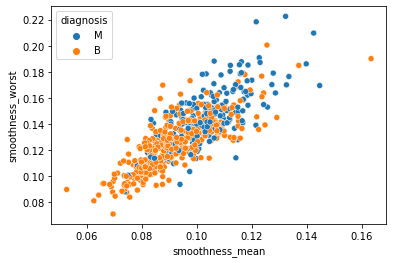

In [41]:
sns.scatterplot(x='smoothness_mean',y='smoothness_worst',data=bc,hue='diagnosis')

<AxesSubplot:xlabel='compactness_mean', ylabel='compactness_worst'>

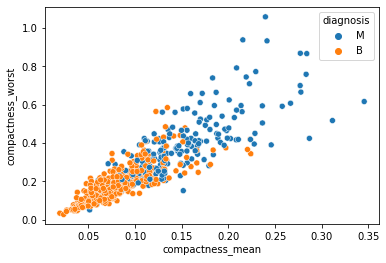

In [42]:
sns.scatterplot(x='compactness_mean',y='compactness_worst',data=bc,hue='diagnosis')

<AxesSubplot:xlabel='concavity_mean', ylabel='concavity_worst'>

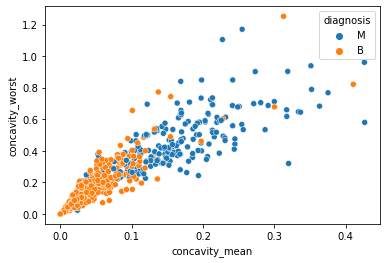

In [43]:
sns.scatterplot(x='concavity_mean',y='concavity_worst',data=bc,hue='diagnosis')

<AxesSubplot:xlabel='concave points_mean', ylabel='concave points_worst'>

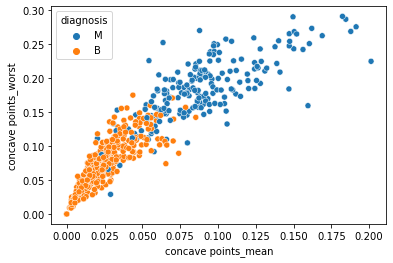

In [44]:
sns.scatterplot(x='concave points_mean',y='concave points_worst',data=bc,hue='diagnosis')

<AxesSubplot:xlabel='radius_mean', ylabel='symmetry_worst'>

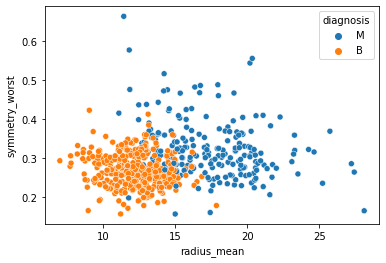

In [45]:
sns.scatterplot(x='radius_mean',y='symmetry_worst',data=bc,hue='diagnosis')

<AxesSubplot:xlabel='radius_mean', ylabel='radius_worst'>

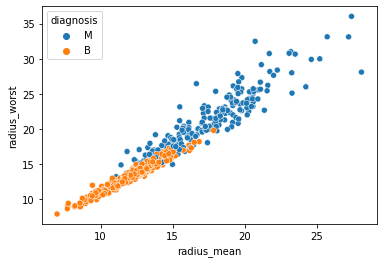

In [46]:
sns.scatterplot(x='radius_mean',y='radius_worst',data=bc,hue='diagnosis')

In [47]:
# Label Encoding
le = LabelEncoder() # convert data into numbers according to alphabetical order
le.fit_transform(bc['diagnosis'])

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

# 4. Split the data into Training and Testing

In [48]:
# Independent Variable
X = bc.drop(columns = ["id", "diagnosis"]).values

# Dependent Variable
y = bc["diagnosis"].values

In [49]:
print("Input Instances: ")
print(X)
print()
print("Target Values: ")
print(y)
print()
print("Unique Values: ")
print(np.unique(y))

Input Instances: 
[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]

Target Values: 
['M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M'
 'M' 'B' 'B' 'B' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M'
 'M' 'B' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'M'
 'M' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'M' 'B'
 'M' 'M' 'B' 'M' 'B' 'M' 'M' 'B' 'B' 'B' 'M' 'M' 'B' 'M' 'M' 'M' 'B' 'B'
 'B' 'M' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'B'
 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'M' 'B' 'M' 'M' 'B' 'B' 'B'
 'M' 'M' 'B' 'M' 'B' 'M' 'M' 'B' 'M' 'M' 'B' '

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
print("Complete Data: ")
print(np.shape(X))
print()
print("Training Data: ")

print(np.shape(X_train))
print()
print("Testing Data: ")

print(np.shape(X_test))

Complete Data: 
(569, 30)

Training Data: 
(426, 30)

Testing Data: 
(143, 30)


In [51]:
sc = StandardScaler()
sc.fit(X_train)
X_train_sc = sc.transform(X_train) 
X_test_sc = sc.transform(X_test)

print(X_train_sc)
print()
print(X_test_sc)

[[-0.65079907 -0.43057322 -0.68024847 ... -0.36433881  0.32349851
  -0.7578486 ]
 [-0.82835341  0.15226547 -0.82773762 ... -1.45036679  0.62563098
  -1.03071387]
 [ 1.68277234  2.18977235  1.60009756 ...  0.72504581 -0.51329768
  -0.96601386]
 ...
 [-1.33114223 -0.22172269 -1.3242844  ... -0.98806491 -0.69995543
  -0.12266325]
 [-1.25110186 -0.24600763 -1.28700242 ... -1.75887319 -1.56206114
  -1.00989735]
 [-0.74662205  1.14066273 -0.72203706 ... -0.2860679  -1.24094654
   0.2126516 ]]

[[-0.21395901  0.3125461  -0.14355187 ...  1.37043754  1.08911166
   1.53928319]
 [-0.26750714  1.461224   -0.32955207 ... -0.84266106 -0.71577388
  -0.88105993]
 [-0.03922298 -0.86770223 -0.10463112 ... -0.505318   -1.20298225
  -0.92494342]
 ...
 [-0.51270124 -1.69096186 -0.54095317 ... -0.12632201  0.33773512
  -0.42872244]
 [-0.17732081 -2.01395163 -0.17345939 ... -0.62875108 -0.29500302
  -0.65432858]
 [ 1.5305829  -0.26300709  1.57961296 ...  1.6694843   1.18085869
   0.48889253]]


# Perceptron

Total number of misclassifications: 
5
Accuracy:  0.965034965034965


              precision    recall  f1-score   support

           B       0.97      0.98      0.97        90
           M       0.96      0.94      0.95        53

    accuracy                           0.97       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.96      0.97      0.96       143

[[88  2]
 [ 3 50]]


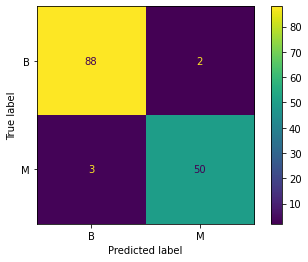

In [52]:
per = Perceptron(eta0 = 0.35, random_state = 0)
per.fit(X_train_sc, y_train)
y_pred = per.predict(X_test_sc)

print("Total number of misclassifications: ")
print((y_test != y_pred).sum())

ac_per=accuracy_score(y_test,y_pred)
print("Accuracy: ",ac_per)
print('\n')
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
print(classification_report(y_test, y_pred))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

# Decision Tree Classifier

In [53]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train,y_train)


y_pred = model.predict(X_test)
print(y_pred)


['M' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'M' 'M' 'M' 'B' 'M'
 'M' 'M' 'M' 'M' 'B' 'B' 'M' 'B' 'B' 'M' 'B' 'M' 'B' 'M' 'B' 'M' 'B' 'M'
 'B' 'M' 'B' 'M' 'M' 'B' 'M' 'B' 'M' 'M' 'B' 'M' 'B' 'M' 'M' 'M' 'M' 'B'
 'B' 'B' 'M' 'B' 'M' 'M' 'M' 'M' 'B' 'B' 'M' 'M' 'M' 'M' 'M' 'B' 'B' 'M'
 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'M' 'B' 'M' 'B' 'B' 'B' 'M' 'M'
 'B' 'M' 'B' 'M' 'M' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'M' 'B'
 'M' 'M' 'B' 'M' 'M' 'M' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'M' 'B'
 'M' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'M']


In [54]:
print("Training Accuracy :", model.score(X_train, y_train))
print("Testing Accuracy :", model.score(X_test, y_test))
ac_dt= model.score(X_test ,y_test)
print("Accuray: ",ac_dt)

Training Accuracy : 1.0
Testing Accuracy : 0.8881118881118881
Accuray:  0.8881118881118881


              precision    recall  f1-score   support

           B       0.97      0.84      0.90        90
           M       0.78      0.96      0.86        53

    accuracy                           0.89       143
   macro avg       0.88      0.90      0.88       143
weighted avg       0.90      0.89      0.89       143

[[76 14]
 [ 2 51]]


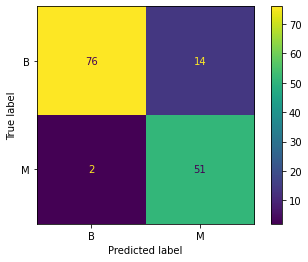

In [55]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
print(classification_report(y_test, y_pred))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

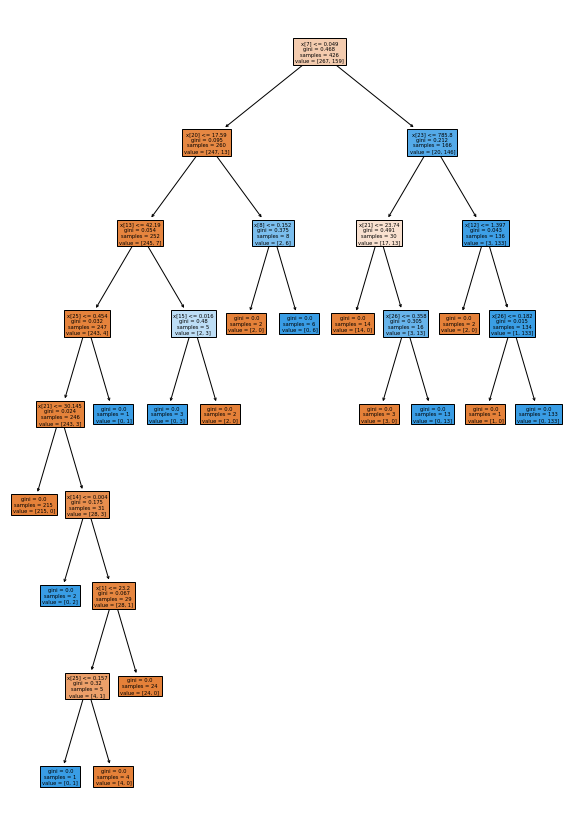

In [56]:
from sklearn import tree
plt.figure(figsize=(10,15))
tree.plot_tree(model,filled=True)
plt.show()

In [57]:
model.feature_importances_

array([0.        , 0.0016609 , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.69955965, 0.01505194, 0.        ,
       0.        , 0.        , 0.01948008, 0.01676117, 0.017502  ,
       0.01204155, 0.        , 0.        , 0.        , 0.        ,
       0.04058449, 0.0520085 , 0.        , 0.07315114, 0.        ,
       0.01777943, 0.03441914, 0.        , 0.        , 0.        ])

# Random Forest Classifier

In [58]:
from sklearn.ensemble import RandomForestClassifier
classifier= RandomForestClassifier(n_estimators= 10,criterion="entropy")

classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [59]:
print("Training Accuracy :", classifier.score(X_train, y_train))
print("Testing Accuracy :", classifier.score(X_test, y_test))
ac_rf=accuracy_score(y_test,y_pred)
print("Accuracy: ",ac_rf)


Training Accuracy : 0.9929577464788732
Testing Accuracy : 0.972027972027972
Accuracy:  0.972027972027972


              precision    recall  f1-score   support

           B       0.99      0.97      0.98        90
           M       0.95      0.98      0.96        53

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143

[[87  3]
 [ 1 52]]


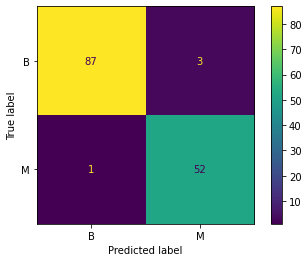

In [60]:
print(classification_report(y_test, y_pred))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

In [61]:
classifier.feature_importances_

array([0.00131756, 0.0122574 , 0.01643987, 0.00561674, 0.00636107,
       0.00433143, 0.05026743, 0.07676356, 0.00491754, 0.00583022,
       0.00306619, 0.01226889, 0.00732695, 0.02050617, 0.00599487,
       0.00867104, 0.00992972, 0.01492668, 0.0019444 , 0.00556569,
       0.20456181, 0.01930843, 0.20814671, 0.10383451, 0.00888441,
       0.05091516, 0.04061647, 0.06849539, 0.01132042, 0.00961328])

# Logistic Regression

['M' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'M' 'B' 'M'
 'M' 'M' 'M' 'M' 'B' 'B' 'M' 'B' 'B' 'M' 'B' 'M' 'B' 'M' 'B' 'M' 'B' 'M'
 'B' 'M' 'B' 'M' 'M' 'B' 'M' 'B' 'M' 'M' 'B' 'B' 'B' 'M' 'M' 'M' 'M' 'B'
 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'M' 'B' 'B' 'M' 'B' 'M' 'M' 'M' 'B' 'M' 'M'
 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'M' 'B' 'M' 'B' 'B' 'B' 'M' 'M'
 'B' 'M' 'M' 'M' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'M' 'B'
 'M' 'M' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'M' 'B'
 'M' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'M']
Training Accuracy : 0.960093896713615
Testing Accuracy : 0.958041958041958
Accuracy:  0.958041958041958
              precision    recall  f1-score   support

           B       0.99      0.94      0.97        90
           M       0.91      0.98      0.95        53

    accuracy                           0.96       143
   macro avg       0.95      0.96      0.96       143
weighted avg       0.96      0.96      0.96

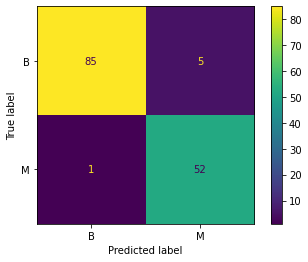

In [62]:
lg = LogisticRegression()
lg.fit(X_train,y_train)


y_pred = lg.predict(X_test)
print(y_pred)


print("Training Accuracy :", lg.score(X_train, y_train))
print("Testing Accuracy :", lg.score(X_test, y_test))
ac_lg= lg.score(X_test ,y_test)
print("Accuracy: ", ac_lg)


from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
print(classification_report(y_test, y_pred))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

# Naive Bayes

Accuracy: 0.9370629370629371
Training Accuracy : 0.9507042253521126
Testing Accuracy : 0.9370629370629371
              precision    recall  f1-score   support

           B       0.95      0.96      0.95        90
           M       0.92      0.91      0.91        53

    accuracy                           0.94       143
   macro avg       0.93      0.93      0.93       143
weighted avg       0.94      0.94      0.94       143

[[86  4]
 [ 5 48]]


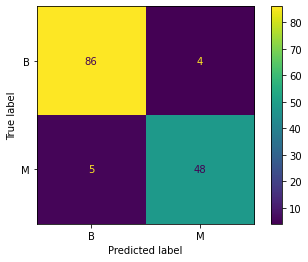

In [63]:
nb= GaussianNB()

nb.fit(X_train, y_train)

y_pred = nb.predict(X_test)

# Evaluate the performance
ac_nb = accuracy_score(y_test, y_pred)
print("Accuracy:", ac_nb)


print("Training Accuracy :", nb.score(X_train, y_train))
print("Testing Accuracy :", nb.score(X_test, y_test))


from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
print(classification_report(y_test, y_pred))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

# 5. Performance Comparison

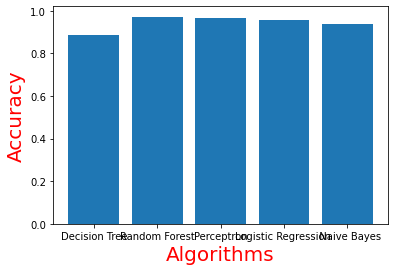

In [64]:
# Comparison of Algorithm's Accuracy
plt.bar(['Decision Tree','Random Forest', 'Perceptron', 'Logistic Regression ','  Naive Bayes'],[ac_dt,ac_rf, ac_per,ac_lg, ac_nb])
plt.xlabel("Algorithms", color = 'red', fontsize=20)
plt.ylabel("Accuracy", color='red', fontsize=20)
plt.show()